# Assignment 1

### Q1a. Distribution of the living area

In [1]:
import pandas as pd
path = 'https://raw.githubusercontent.com/cinnData/DataSci/main/Data/'
filename = path + 'roxbury.csv'
df = pd.read_csv(filename)

In [14]:
df['living_percent'] = 100*df['living_area']/df['gross_area']
df

KeyError: 'living_area'

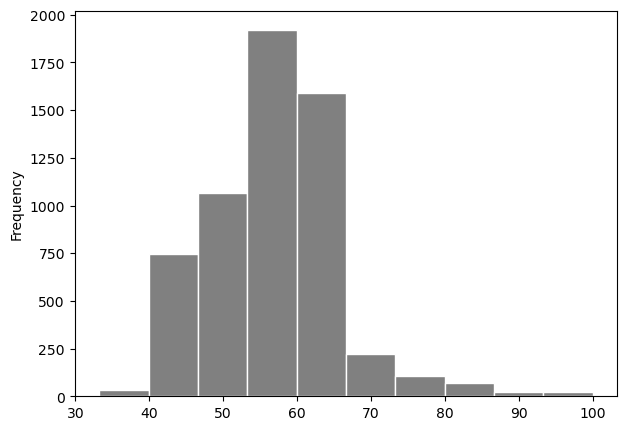

In [3]:
df['living_percent'].plot.hist(figsize=(7,5), color='gray', edgecolor='white');

### Q1b. Association with the home value

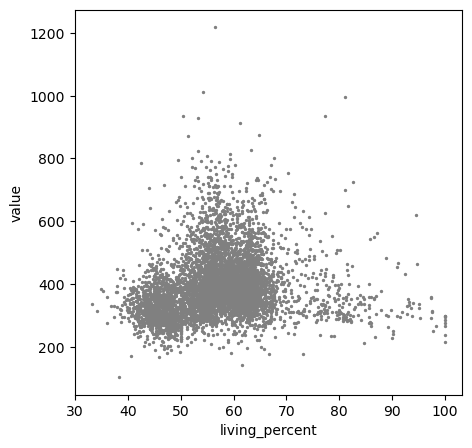

In [4]:
df.plot.scatter(x='living_percent', y='value', figsize=(5,5), color='gray', s=2);

In [5]:
df[['living_percent', 'value']].corr().round(2)

living_percent  value
living_percent            1.00   0.18
value                     0.18   1.00

In [6]:
df['living_percent'].corr(df['value']).round(2)

0.18

### Q2. Hosts with many listings

In [7]:
filename = path + 'airbnb.csv'
df = pd.read_csv(filename, index_col=0)

In [8]:
df['host_id'].value_counts().head(10)

346367515    241
32037490     183
4459553      174
158023606    136
299462       128
1447144      123
1391607      121
36607755     120
396363       113
265193861     98
Name: host_id, dtype: int64

### Q3a. Pick the hosts with more than 100 listings

In [11]:
superhost_table = df['host_id'].value_counts()[df['host_id'].value_counts() > 100]
superhost_table

346367515    241
32037490     183
4459553      174
158023606    136
299462       128
1447144      123
1391607      121
36607755     120
396363       113
Name: host_id, dtype: int64

In [12]:
superhost_list = superhost_table.index
superhost_list

Int64Index([346367515,  32037490,   4459553, 158023606,    299462,   1447144,
              1391607,  36607755,    396363],
           dtype='int64')

### Q3b. Data subset containing only the listings managed by those hosts

In [13]:
df1 = df[df['host_id'].isin(superhost_list)]
df1

host_id  host_since  \
id                                          
38091474              1391607  2011-11-10   
563588511729472297   36607755  2015-06-24   
46524035               396363  2011-02-17   
50303247              1391607  2011-11-10   
563538751160608752   36607755  2015-06-24   
...                       ...         ...   
729403779039558814  346367515  2020-05-15   
638791995198021450   32037490  2015-04-27   
29087411              1447144  2011-11-27   
49627292            346367515  2020-05-15   
54116226             32037490  2015-04-27   

                                                                 name  \
id                                                                      
38091474                     Cosy apartment next to Sagrada Familia I   
563588511729472297                  Bonita habitación doble en Gràcia   
46524035                                      072. Fútbol 5 Apartment   
50303247                                      Cozy Diagonal Apartment   
563538751160608752              Habitación doble con balcón en Gràcia   
...                                                               ...   
729403779039558814     priego- 2 bedroom apartment  in eixample dreta   
638791995198021450             Sweet Inn | Cosy 3BR Apts. in Eixample   
29087411            pdo12 GREAT LOCATION GOTHIC! HAPPY ACOMODIS FL...   
49627292                   ERAWAN - One bedroom apartment in Eixample   
54116226                        Sweet Inn | Stylish Apt. near Ramblas   

                                 neighbourhood             district  \
id                                                                    
38091474            el Camp de l'Arpa del Clot           Sant Martí   
563588511729472297           la Vila de Gràcia               Gràcia   
46524035                             les Corts            Les Corts   
50303247                Sant Gervasi - Galvany  Sarrià-Sant Gervasi   
563538751160608752           la Vila de Gràcia               Gràcia   
...                                        ...                  ...   
729403779039558814      la Dreta de l'Eixample             Eixample   
638791995198021450                 Sant Antoni             Eixample   
29087411                        el Barri Gòtic         Ciutat Vella   
49627292                la Dreta de l'Eixample             Eixample   
54116226                        el Barri Gòtic         Ciutat Vella   

                                  property_type        room_type  bedrooms  \
id                                                                           
38091474                     Entire rental unit  Entire home/apt       1.0   
563588511729472297  Private room in rental unit     Private room       1.0   
46524035                     Entire rental unit  Entire home/apt       2.0   
50303247                     Entire rental unit  Entire home/apt       1.0   
563538751160608752  Private room in rental unit     Private room       1.0   
...                                         ...              ...       ...   
729403779039558814           Entire rental unit  Entire home/apt       2.0   
638791995198021450           Entire rental unit  Entire home/apt       3.0   
29087411                     Entire rental unit  Entire home/apt       4.0   
49627292                     Entire rental unit  Entire home/apt       1.0   
54116226                     Entire rental unit  Entire home/apt       3.0   

                    price  number_of_reviews  review_scores_rating  
id                                                                  
38091474            107.0                 37                  4.05  
563588511729472297   29.0                  0                   NaN  
46524035            183.0                 10                  3.80  
50303247            102.0                  7                  4.14  
563538751160608752   29.0                  0                   NaN  
...                   ...                ...                   .

### Q3c. Are those particular hosts focused on certain neighbourhoods?

In [15]:
df.groupby(by='neighbourhood')['price'].agg(['count', 'median']).sort_values(by='count',
  ascending=False).head(10)

count  median
neighbourhood                                       
la Dreta de l'Eixample                  2029   159.0
el Raval                                1265    70.0
el Barri Gòtic                          1064    77.0
Sant Pere, Santa Caterina i la Ribera    980    82.5
la Vila de Gràcia                        946   111.0
la Sagrada Família                       943   126.0
l'Antiga Esquerra de l'Eixample          893   127.0
Sant Antoni                              784   122.0
el Poble Sec                             739    94.0
la Nova Esquerra de l'Eixample           612    90.0

In [16]:
df1['neighbourhood'].value_counts().head(10)

la Dreta de l'Eixample                   237
la Sagrada Família                       134
la Vila de Gràcia                        131
l'Antiga Esquerra de l'Eixample          124
Sant Antoni                               88
la Nova Esquerra de l'Eixample            72
el Barri Gòtic                            68
el Poble Sec                              67
Sant Pere, Santa Caterina i la Ribera     58
el Fort Pienc                             48
Name: neighbourhood, dtype: int64